# Using 'Isotope' class for Picarro calculations

In [1]:
cd ..

C:\Users\csas1756\Documents\GitHub\picarro-calculator


This notebook makes use of a new python class: Isotope.
This class and its methods are found in the module Picarro, which we import below.

In [2]:
import Picarro as pica

## Get a full run of the data
In the Picarro module, it is possible to directly call for a full run of the data.

This takes the form of:

   ```RUN = Picarro.FullRun(filename)```

and returns two instances of the Merged class.

In [3]:
#

RUN = pica.Isotope('example_data/HKDS2009_IsoWater_20191123_121229.csv')
RUN.readRaw()
RUN.checkEmpty()
RUN.checkVolume()
RUN.setPrimaryKey()
RUN.runSummary()
RUN.IsotopeSelect('O')
RUN.initMemCoeffs()
RUN.Optimize('O',method = 'default')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Cannot convert column Analysis to numeric type
Cannot convert column Time Code to numeric type
Cannot convert column Port to numeric type
Cannot convert column Gas Configuration to numeric type
Cannot convert column Method to numeric type
creating a directory to store the data


In [4]:
run=pica.FullRun('example_data/HKDS2009_IsoWater_20191123_121229.csv')

Running the corrections for Oxygen 
 ... 
 ...
Cannot convert column Analysis to numeric type
Cannot convert column Time Code to numeric type
Cannot convert column Port to numeric type
Cannot convert column Gas Configuration to numeric type
Cannot convert column Method to numeric type


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Checking: VB027 ...
Standard dev is good
11432.0
Checking: VB023 ...
Standard dev is good
11428.0
Checking: VB035 ...
Standard dev is good
11441.0
Checking: VB031 ...
Standard dev is good
11437.0
Checking: HUSN ...
Standard dev too high get rid of measurement 1
11423.0
Checking: VB029 ...
Standard dev too high get rid of measurement 3
11434.0
Checking: VB030 ...
Standard dev is good
11435.0
Checking: VB034 ...
Standard dev is good
11440.0
Checking: VB028 ...
Standard dev is good
11433.0
Checking: VB025 ...
Standard dev is good
11430.0
Checking: VB024 ...
Standard dev too high get rid of measurement 2
11429.0
Checking: VB020 ...
Standard dev too high get rid of measurement 1
11424.0
11420.0
Checking: VB037 ...
Standard dev is good
11443.0
Checking: VB032 ...
Standard dev is good
11438.0
Checking: VB021 ...
Standard dev is good
11425.0
Checking: VB033 ...
Standard dev is good
11439.0
Checking: VB038 ...
Standard dev is good
11444.0
11419.0
11422.0
Checking: VB026 ...
Standard dev is good

In [4]:
RUN.corr.loc["KB2_38m"]

key   Line  d(18_16)Mean  Ignore  Error Code  \
Identifier 2      Inj Nr                                                    
181129Voegelsberg 1       9142.0  105.0       -15.593    -1.0         0.0   
                  3       9142.0  107.0       -15.938    -1.0         0.0   
                  4       9142.0  108.0       -15.679     0.0         0.0   

                                RUN_ID  
Identifier 2      Inj Nr                
181129Voegelsberg 1       2.019011e+13  
                  3       2.019011e+13  
                  4       2.019011e+13

## Overview of the Isotope class

In the **Isotope** class, a variety of methods are available, so of which are used discreetly in the `FullRun()` function above.

They are:

For an initial treatment of the data:
```
readRaw() 
checkEmpty()
checkVolume()
runSummary()
```

For the computation of correction coefficients (workhorse of the class)
```
IsotopeSelect()
initMemCoeffs()
Optimize()
MemoryCorrection()
driftCorrect()
VSMOWcorrect()
```

For additional checks
```
getMeanSDs()
checkStandards()
```

For plotting convenience:

```
plotSummary()
memCorrPlot()
driftCorrPlot()
VSMOWCorrPlot()
```

## Other functions of the Picarro module

Below are a list of other functions available within the Picarro module:

```
1) Run()
2) FullRun()
3) Merge()
4) OverviewPlot()
5) DatatoCSV()
```

#### 1 Picarro.Run()

This function takes in two arguments: 
1. Isotope of choice: "O" or "D"
2. Filename: the path to csv data

Returns an object of class **Isotope**

An example usage: 

``` Isotope = Picarro.Run(isotope,path/to/file)```

#### 2 Picarro.FullRun()

This function takes in one argument:
1. Filename: the path to csv data

It returns one object of class **Merge**. This instance of class **Merged** has two class variables: O18 and D, which are themselves of Class **Isotope**, so all the above methods can be called on them.

Example usage:

``` RUN = Picarro.FullRun(path/to_file)```

*Note that this is what was done in the cells above, for the 'quick and dirty' full run of the data*



#### 3 Picarro.Merge()

This function takes two arguments; each must be an instance of class **Isotope**. It returns a pandas DataFrame, containing the summary data of the run.

Example usage: 

``` df = Picarro.Merge(Iso1,Iso2)```



In [7]:
RUN.O18.plotSummary()

AttributeError: 'Isotope' object has no attribute 'O18'

In [8]:
RUN = pica.FullRun('example_data/HKDS2009_IsoWater_20190417_075229.csv')

Running the corrections for Oxygen 
 ... 
 ...
Your file has 133 lines. I give up now...


SystemExit: 

/Users/AchilleTalon/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


KeyError: 'W22'

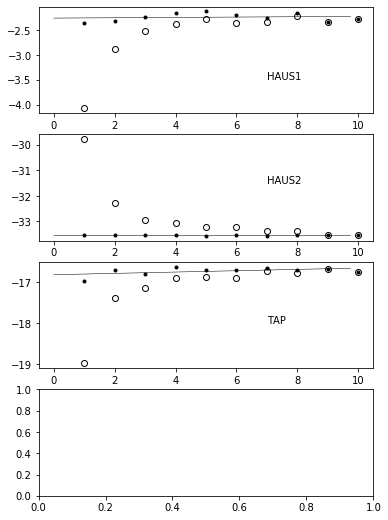

In [5]:
run.O18.memCorrPlot("O")
run.O18.driftCorrPlot("O")
run.O18.VSMOWCorrPlot("O")

In [ ]:
RUN.O18.corr.head(30)

KeyError: 'W22'

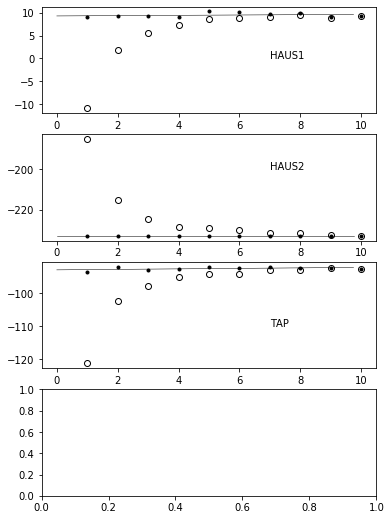

In [6]:
run.D.memCorrPlot("H")
run.D.driftCorrPlot("H")
run.D.VSMOWCorrPlot("H")

In [ ]:
RUN.O18.corr

In [ ]:
RUN.coeffs

#### 4 Picarro.OverviewPlot()

This function takes two arguments; each must be an instance of class **Isotope**. It enables the plotting of the summary data.

Example usage:

```Picarro.OverviewPlot(Iso1,Iso2)```


#### 5 Picarro.DatatoCSV()

This function takes two arguments; each must be an instance of class **Isotope**. The function writes the data to csv file for convenience of the user. 

Further development should include:

1. Checking that the file does not already exist.
2. Writing a new file it does not.

Example usage:

```Picarro.DatatoCSV(Iso1,Iso2)```



In [ ]:
RUN.coeffs["H"]

In [ ]:
RUN.suggestedReruns()

In [ ]:
RUN.merge